###  <u> *EDA Features Importance for severity and frequency*  </u>

In [ ]:
%run 3_EDA.ipynb

---


### *A.* <u>*Apply mutual_info_regression*</u>

In [4]:
df2=df.copy()

* ####  <u>  <u>*Create mutual_info_regression Function :*</u>

In [5]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

* ####  <u> *severity as a Target Feature :*  </u>

In [6]:
X_1 = df2.copy()
y_1= X_1.pop("severity")
# Label encoding for categoricals
for colname in X_1.select_dtypes("object"):
    X_1[colname], _ = X_1[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features_1 = X_1.dtypes == int

* ####  <u> *frequency as a Target Feature :*  </u>

In [7]:
X_2 = df2.copy()
y_2= X_2.pop("frequincy")
# Label encoding for categoricals
for colname in X_2.select_dtypes("object"):
    X_2[colname], _ = X_2[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features_2 = X_2.dtypes == int

* ####  <u>  <u>*Apply mutual_info_regression Function :*</u>

In [8]:
mi_scores_1 = make_mi_scores(X_1, y_1, discrete_features_1)
mi_scores_2 = make_mi_scores(X_2, y_2, discrete_features_2)

In [20]:
print(f"\n Faetures Importance for Severity Feature:\n {mi_scores_1}")  # show a few features with their MI scores

print(f"\n Faetures Importance for Severity Feature:\n {mi_scores_2}")  # show a few features with their MI scores


 Faetures Importance for Severity Feature:
 claimcst0    0.611497
numclaims    0.250750
frequincy    0.250065
clm          0.249947
exposure     0.013776
area         0.004217
veh_value    0.003044
veh_body     0.002961
agecat       0.001514
veh_age      0.000000
gender       0.000000
Name: MI Scores, dtype: float64

 Faetures Importance for Severity Feature:
 exposure     0.352058
numclaims    0.259580
claimcst0    0.246883
clm          0.244819
severity     0.244665
veh_value    0.006689
veh_body     0.001409
agecat       0.000367
veh_age      0.000000
gender       0.000000
area         0.000000
Name: MI Scores, dtype: float64


* ####  <u>  <u>*Visualize mutual_info_regression results :*</u>

In [21]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)

Text(0.5, 1.0, 'frequency Mutual Information Scores')

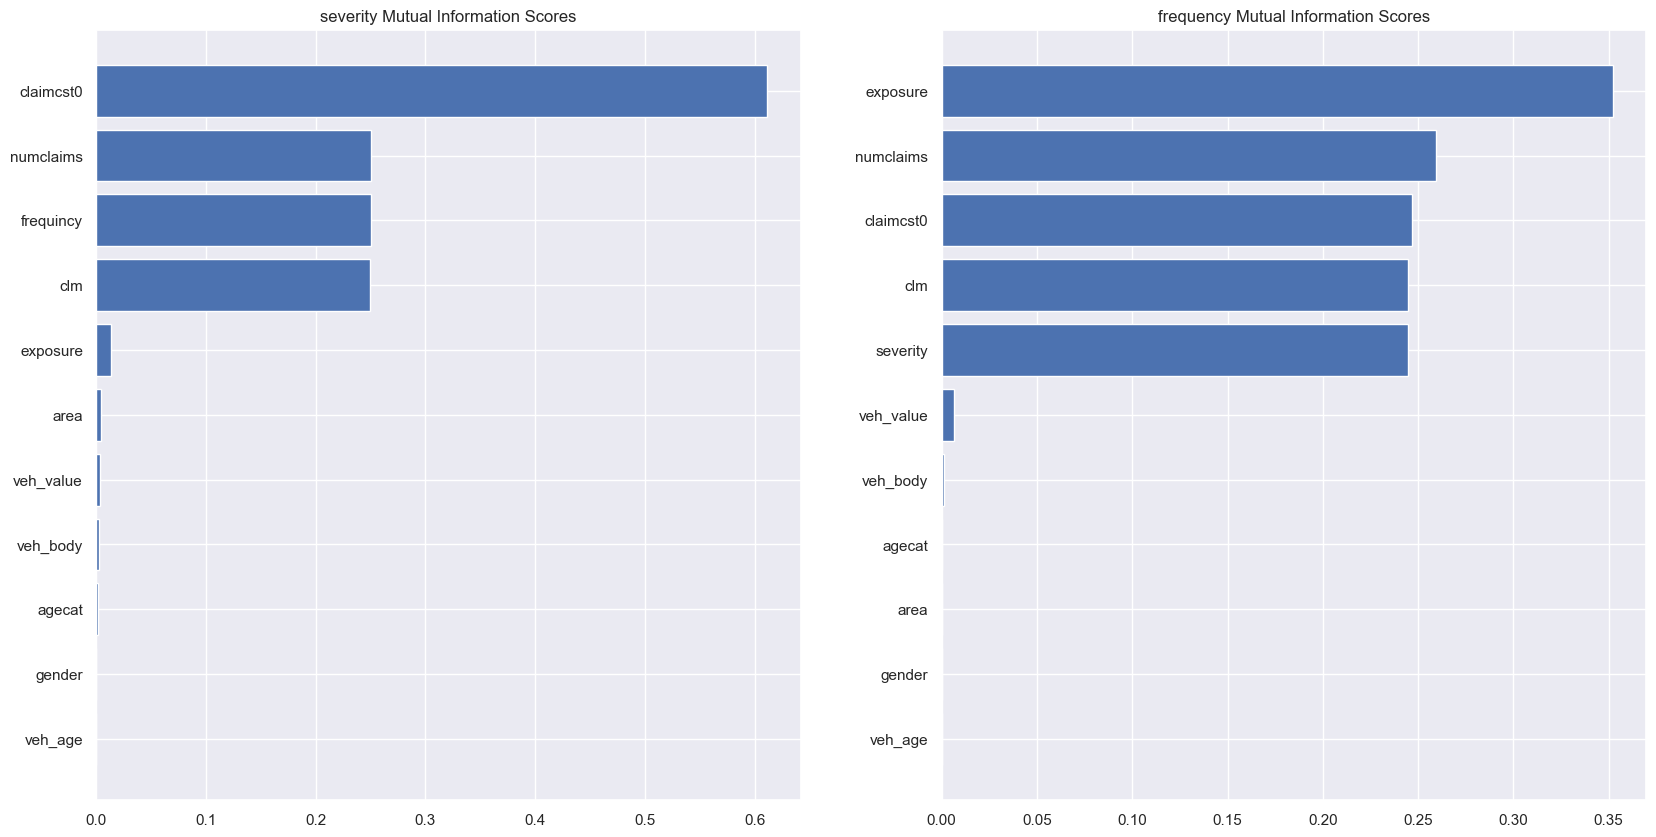

In [22]:
plt.subplot(121)
plot_mi_scores(mi_scores_1)
plt.title("severity Mutual Information Scores")
plt.subplot(122)
plot_mi_scores(mi_scores_2)
plt.title("frequency Mutual Information Scores")

### *B.* <u>*Apply boruta Function*</u>

In [16]:

from boruta import BorutaPy

In [17]:
from xgboost import XGBRegressor
model_XGBRegressor = XGBRegressor(n_estimators=1000,
                                            learning_rate=0.1,
                                            n_jobs=4)

In [19]:
boruta_FeatuteSelection=BorutaPy(model_XGBRegressor,n_estimators="auto",verbose=2,random_state=1)

* ####  <u> *severity as a Target Feature :*  </u>

In [ ]:
boruta_FeatuteSelection.fit(X_1.to_numpy(),y_1.to_numpy())

In [21]:
print("boruta_FeatuteSelection.n_features :",boruta_FeatuteSelection.n_features_)
print("boruta_FeatuteSelection.ranking :", boruta_FeatuteSelection.ranking_)
print("boruta_FeatuteSelection.support :",boruta_FeatuteSelection.support_ )

boruta_FeatuteSelection.n_features : 5
boruta_FeatuteSelection.ranking : [1 1 1 1 1 2 4 3 7 6 5]
boruta_FeatuteSelection.support : [ True  True  True  True  True False False False False False False]


In [22]:
pd.DataFrame({"feature_name":list(X_1.columns),
              "Ranking":boruta_FeatuteSelection.ranking_,
              "boruta_FeatuteSelection.support":boruta_FeatuteSelection.support_}).sort_values(by="Ranking")

,feature_name,Ranking,boruta_FeatuteSelection.support
0,veh_value,1,True
1,exposure,1,True
2,clm,1,True
3,numclaims,1,True
4,claimcst0,1,True
5,veh_body,2,False
7,gender,3,False
6,veh_age,4,False
10,frequincy,5,False
9,agecat,6,False


* ####  <u> *frequency as a Target Feature :*  </u>

In [ ]:
boruta_FeatuteSelection.fit(X_2.to_numpy(),y_2.to_numpy())

In [25]:
print("boruta_FeatuteSelection.n_features :",boruta_FeatuteSelection.n_features_)
print("boruta_FeatuteSelection.ranking :", boruta_FeatuteSelection.ranking_)
print("boruta_FeatuteSelection.support :",boruta_FeatuteSelection.support_ )

boruta_FeatuteSelection.n_features : 5
boruta_FeatuteSelection.ranking : [1 1 1 1 3 5 2 5 5 5 1]
boruta_FeatuteSelection.support : [ True  True  True  True False False False False False False  True]


In [26]:
pd.DataFrame({"feature_name":list(X_2.columns),
              "Ranking":boruta_FeatuteSelection.ranking_,
              "boruta_FeatuteSelection.support":boruta_FeatuteSelection.support_}).sort_values(by="Ranking")

,feature_name,Ranking,boruta_FeatuteSelection.support
0,veh_value,1,True
1,exposure,1,True
2,clm,1,True
3,numclaims,1,True
10,severity,1,True
6,veh_age,2,False
4,claimcst0,3,False
5,veh_body,5,False
7,gender,5,False
8,area,5,False


---